# Toma de Decisiones

# Guía 2

## Ejercicio 1

## Ejercicio 2

## Ejercicio 3

In [1]:
# Si obtienen un error, es porque el paquete no está instalado. Para eso,
# hacen (por única vez)
#install.packages("lestat")

# La función z está en el paquete 'lestat'. con la siguiente línea cargamos el paquete
library(lestat)

Loading required package: MASS


In [2]:
fun_basicsdt <- function(h, f){
  zh <- invcdf(normal(), h)
  zf <- invcdf(normal(), f)
  
  dprim <- zh - zf
  c <- -0.5 * (zh + zf)
  return(c(dprim, c))
}

In [3]:
fun_basicsdt(0.2, 0.4)

[1] -0.5882741  0.5474842

In [4]:
#plot(seq(-3,3,0.1), dnorm(seq(-3,3,0.1)), type='l')

## Ejercicio 4

In [5]:
# Espiritista
fun_basicsdt(0.92, 0.48)

[1]  1.455225 -0.677459

In [6]:
# Partici
fun_basicsdt(0.58, 0.09)

[1] 1.5426485 0.5694308

In [7]:
# Ej 5

h <- 17 / (17+11)
f <- (31-17) / (50-(17+11))

fun_basicsdt(h, f)

[1] -0.07687569 -0.31031785

## Ejercicio 6


In [8]:
h_1 <- 25/30
f_1 <- (30-5)/(200-30)

In [9]:
fun_basicsdt(h_1, f_1)

[1] 2.01655296 0.04085492

In [10]:
h_2 <- 15/28
f_2 <- (28-15)/(150-28)

In [11]:
fun_basicsdt(h_2, f_2)

[1] 1.3346886 0.5777019

## Ejercicio 7

### Simular un experimento de detección $^{[1]}$

En este experimento los participantes deben identificar la presencia de una señal visual ruidosa.

En cada realización (*trial*), se le presenta al participante **'ruido'** o **'señal+ruido'** con igual probabilidad.

En los trials correspondientes a **'señal+ruido'**, el participante recibe un input sensorial que se obtiene sorteando un número al azar de una distribución Normal.

En los trials de **'ruido'** el input sensorial también es Normal pero con un valor medio menor.

El participante fija un criterio de decisión de modo que si la señal sensorial es menor que ese criterio responde **"no"** y si es mayor responde **"si"**.

[1]: Este ejercicio fue propuesto por *Megan Peters* y *Brian Odegaard* en su tutorial *'Computational models of perception, metacognition, and consciousness: a hand-on tutorial'* dictado en el marco de la conferencia *ASSC2018*.

**A-** Fijar los parámetros del modelo de acuerdo a los siguientes datos.

El participante tiene
**d'= 1.5**.

¿Qué desviación estándar elegiría para las distribuciones? Establecer un criterio no sesgado justo en la mitad de los valores medios de las distribuciones.

> Elijo una desviacion estándar de 1 para cada una de las distribuciones.

In [12]:
dp <- 1.5
criterio <- dp / 2

# desviación estándar de la distribución correspondiente a "señal+ruido"
sigmaS <- 1

# desviación estándar de la distribución correspondiente a "ruido"
sigmaN <- 1

# Centro el ruido en 0
muN <- 0

muS <- muN + dp

#### Plot de las distribuciones de arriba

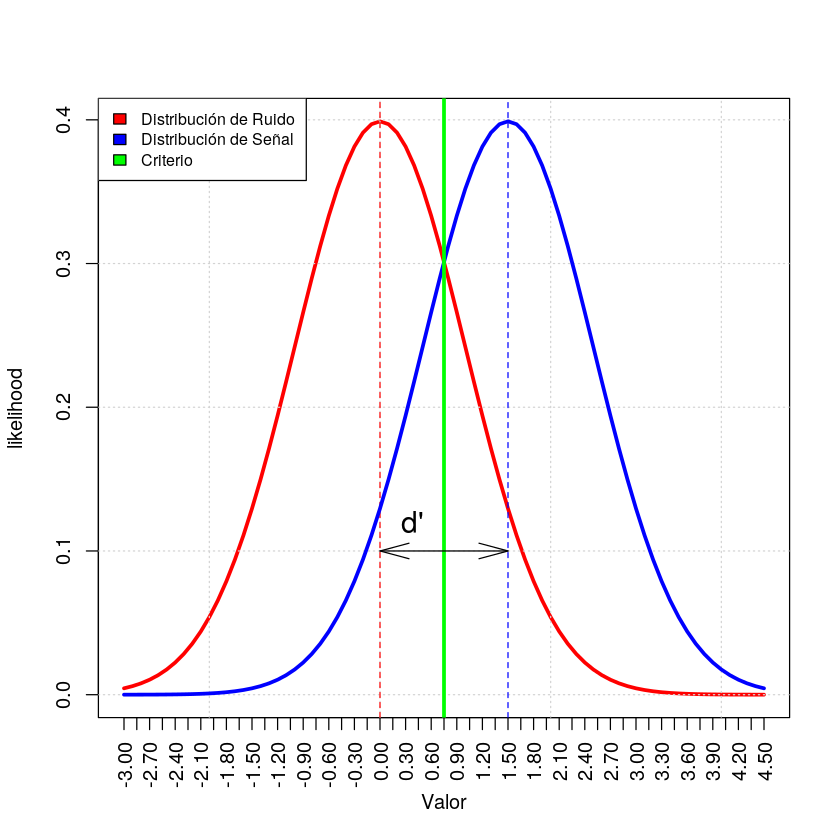

In [13]:
grilla <- seq(muN-3, muS+3, 0.1)
plot(grilla, dnorm(grilla, mean=muN), xlab='Valor', ylab='likelihood',
     type='l', col='red', lwd=3, xaxt='n')
axis(1, at=seq(muN-3, muS+3, 0.15), las=2)
grid()
abline(v=muN, col='red', lwd=1, lty=2)
points(grilla, dnorm(grilla, mean=muS), type='l', col='blue', lwd=3)
abline(v=muS, col='blue', lwd=1, lty=2)
abline(v=criterio, col='green', lwd=3)
legend("topleft", cex=0.8, fill=c('red','blue','green'), 
       legend=c('Distribución de Ruido','Distribución de Señal','Criterio'))
arrows(x0=muN, x1=muS, y0=0.1, y1=0.1, code=3, angle = 15)
text(x=dp/4, y=0.12, "d'", cex=1.5)

**B-** Usando la función `rnorm` generar **500 muestras de la distribución "señal+ruido"** y **500 de la distribución "ruido"**.

Guardar la información de qué tipo de trial es cada muestra.

In [14]:
ntrialsS <- 500
ntrialsN <- 500

# La información de qué estímulo corresponde a cada trial la vamos a guardar en la
# variable Label:
# señal+ruido ---> 1
# ruido ---> 0
# Crear un vector de Labels para cada tipo de estímulo. El largo de cada vector debe ser
# ntrialsS y ntrialsN
signalLabels <- rep(1, ntrialsS)
noiseLabels  <- rep(0, ntrialsN)

# Tomar las muestras de cada distribución.
signalSamples <- rnorm(ntrialsS, mean=muS, sd=sigmaS)
noiseSamples  <- rnorm(ntrialsN, mean=muN, sd=sigmaN)

# Poner todas las muestras juntas, primero las de'señal+ruido', luego las de'ruido'
allSamples <- append(signalSamples, noiseSamples)

# Hacer lo mismo con los vectores de Labels
allLabels <- append(signalLabels, noiseLabels)

#### Histograma de las muestras de arriba

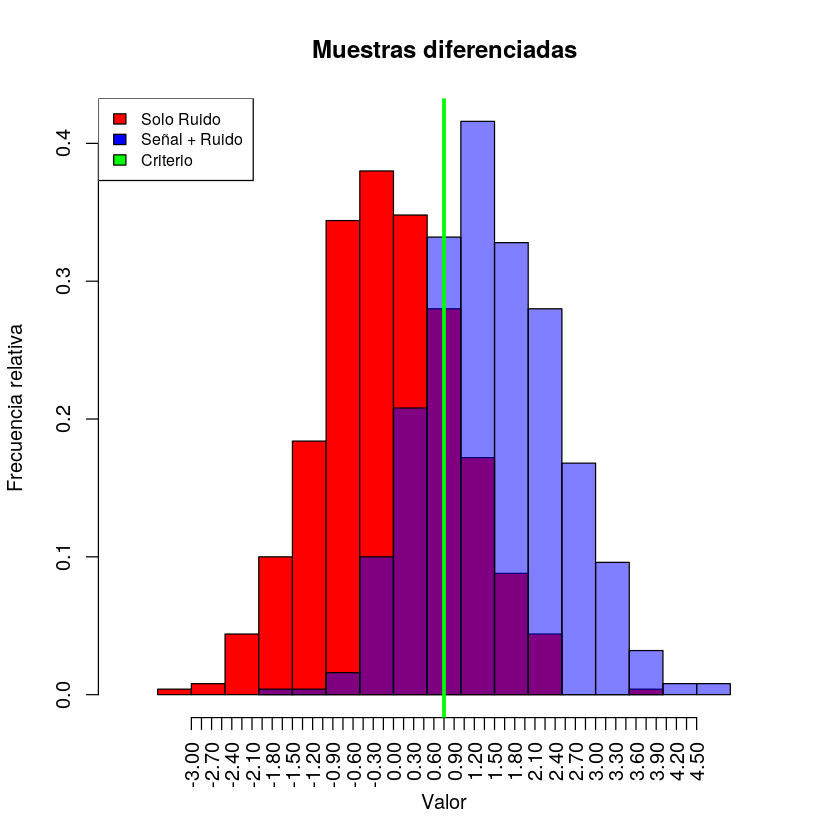

In [15]:
# Defino maxCount para que el segundo histograma no se vaya del grafico
maxCount <- max(hist(noiseSamples, plot=F)$density, hist(signalSamples, plot=F)$density)
hist(noiseSamples, col='red', xlim=c(muN-4,muS+4), ylim=c(0, maxCount), freq=F,
    main="Muestras diferenciadas", xlab='Valor', ylab='Frecuencia relativa', xaxt='n')
hist(signalSamples, add=T, col=rgb(0.0,0.0,1,0.5), alpha=0.5, freq=F)
axis(1, at=seq(muN-3, muS+3, 0.15), las=2)
abline(v=criterio, col='green', lwd=3)
legend("topleft", cex=0.8, fill=c('red','blue','green'), 
       legend=c('Solo Ruido','Señal + Ruido','Criterio'))

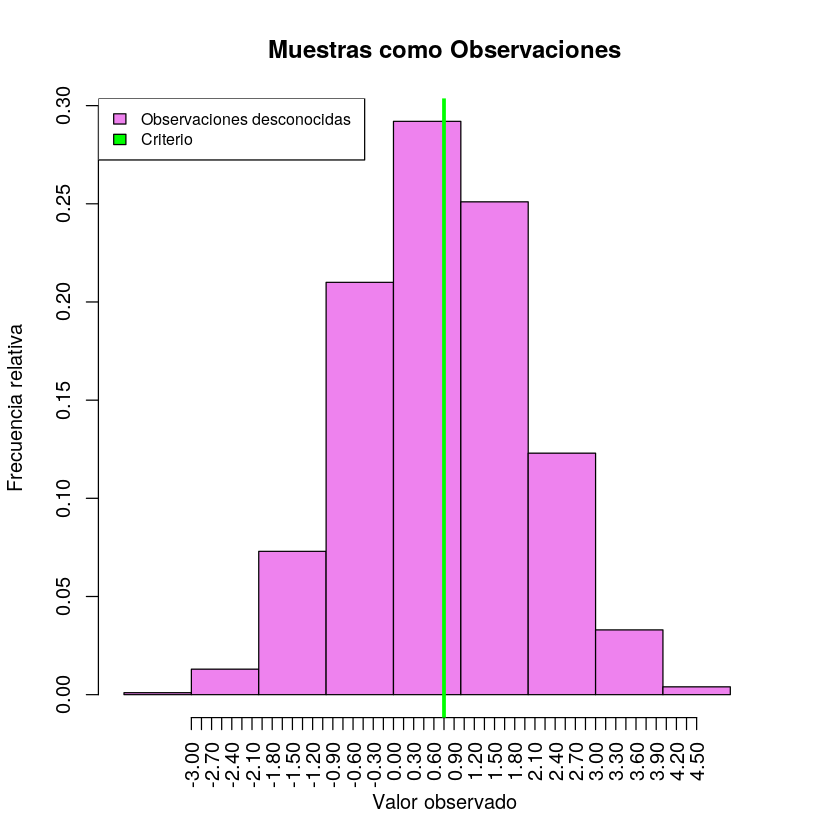

In [16]:
hist(c(noiseSamples,signalSamples), col='violet', xlim=c(muN-4,muS+4), freq=F,
    main="Muestras como Observaciones", xlab='Valor observado', ylab='Frecuencia relativa',xaxt='n')
axis(1, at=seq(muN-3, muS+3, 0.15), las=2)
abline(v=criterio, col='green', lwd=3)
legend("topleft", cex=0.8, fill=c('violet','green'), 
       legend=c('Observaciones desconocidas','Criterio'))

**C-** Para cada muestra, simular la decisión del participante: ¿había un target presente o no?

Si la muestra es mayor que el criterio fijado, la respuesta es “si”. Caso contrario, es “no”.

In [17]:
decision <- as.integer(allSamples > criterio)

In [18]:
isCorrect <- decision == allLabels
percentCorrect <- mean(isCorrect)

In [19]:
# definir un vector isHit y otro isFA que evalúa si cada trial es un hit o una
# falsa alarma, respectivamente.
isHit <- isCorrect == 1 & decision == 1
isFA  <- isCorrect == 0 & decision == 1
# suma los vectores anteriores para tener el número de hits y falsas alarmas
nHits <- sum(isHit)
nFAs  <- sum(isFA)
# calcula la tasa de hits y de falsas alarmas
h <- nHits / ntrialsS
f <- nFAs / ntrialsN

#### Representación

En el histograma de arriba, h y f se verán representadas como el área bajo "las curvas" a la derecha del criterio de decisión:

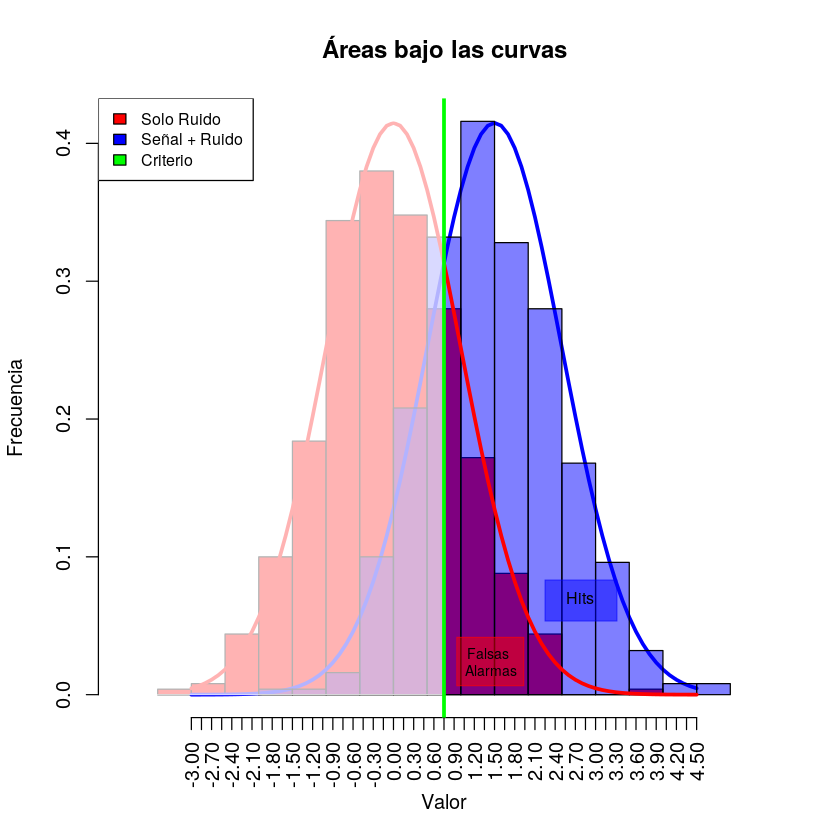

In [20]:
# Defino maxCount para que el segundo histograma no se vaya del grafico
maxCount <- max(hist(noiseSamples, plot=F)$density, hist(signalSamples, plot=F)$density)
# Histograma de Ruido y su curva
hist(noiseSamples, col='red', xlim=c(muN-4,muS+4), ylim=c(0, maxCount), freq=F,
    main="Áreas bajo las curvas", xlab='Valor', ylab='Frecuencia', xaxt='n')
points(grilla, dnorm(grilla, mean=muS)*maxCount*2.5, type='l', col='blue', lwd=3)
# Histograma de Señal + Ruido y su curva
hist(signalSamples, add=T, col=rgb(0.0,0.0,1,0.5), alpha=0.5, freq=F)
points(grilla, dnorm(grilla, mean=muN)*maxCount*2.5, type='l', col='red', lwd=3)
axis(1, at=seq(muN-3, muS+3, 0.15), las=2)
# Transparento valores a la izquierda
rect(xleft=-4, xright=criterio, ybottom=0, ytop=maxCount, col=rgb(1,1,1,0.7), border=rgb(1,1,1,0.5))
# Criterio
abline(v=criterio, col='green', lwd=3)
# Texto para h y f
legend(x=1.25*criterio, y=maxCount/10, "Falsas \nAlarmas", adj=c(0.35,0.3), cex=0.7,
      bg=rgb(1,0.0,0,0.5), box.col =rgb(1,0.0,0,0.5), text.width=0.5)
legend(x=3*criterio, y=maxCount/5, "Hits", adj=c(0.35,0.3), cex=0.8,
      bg=rgb(0,0.0,1,0.5), box.col =rgb(0,0.0,1,0.5), text.width=0.5)
legend("topleft", cex=0.8, fill=c('red','blue','green'), 
       legend=c('Solo Ruido','Señal + Ruido','Criterio'))

**F-** Calcular $d'$ y el **sesgo de respuesta** que exhibe el participante, $c$.

>**Importante:** a veces el sesgo de respuesta se llama criterio, pero no hay que confundirlo con el criterio de decisión que definimos antes.
>
>En este cálculo estamos determinando cuánto se desvía el criterio del observador respecto del punto medio de las dos distribuciones.
>
>Por lo tanto, si el observador es perfectamente no sesgado, "c" debería ser 0.
>
>Este "c" no coincide con el criterio porque el valor del criterio que definimos antes depende
de la elección que hayamos hecho para definir las distribuciones y hacer la simulación.



Usando la función del punto 1, calculo $d'$ y sesgo de respuesta $c$

In [21]:
library(lestat)
fun_basicsdt <- function(h, f){
  zh <- invcdf(normal(), h)
  zf <- invcdf(normal(), f)
  
  dprim <- zh - zf
  c <- -0.5 * (zh + zf)
  return(c(dprim, c))
}

In [22]:
valores <- fun_basicsdt(h, f)

dprime_estimado <- valores[1]
c_estimado <- valores[2]

data.frame(dprime_estimado, c_estimado)

dprime_estimado,c_estimado
1.539608,0.05057521


**G-** Comparar los valores de $d'$ y $c$ calculados en **F** con los del modelo que generó los datos.

¿Coincide el $d'$ ? ¿Es realmente no sesgado el observador?

> Usando 500 muestras, tanto $d'$ como $c$ varían cercanos a sus valores esperados.
>
> Usando **500.000** muestras, el $d'$ estimado muestra una diferencia de aproximadamente $1$ en $1.000$
>
> Similarmente, el sesgo estimado es $\pm 1.5 \times 10^{-3}$
>
> Esto indica que es observador es no sesgado.

**H-** ¿Qué pasa si se reduce el número de trials? ¿Qué tan estable es la predicción de la simulación ($d'$ y $c$) de una simulación a la siguiente?

>Reduciendo el número de trials a 50, se observan diferencias de hasta 1.14 en $d'$, y 0.6 en $c$, con desviaciones estándar de 0.28 y 0.14 respectivamente, mostrando poco estabilidad en los experimentos.

In [23]:
experimentos <- function(ntrials){
    ntrialsS <- ntrials
    ntrialsN <- ntrials
    nExp <- 1000
    dprimas <- rep(NA, nExp)
    csesgos <- rep(NA, nExp)
    for(i in 1:nExp){
        signalLabels <- rep(1, ntrialsS)
        noiseLabels  <- rep(0, ntrialsN)

        # Tomar las muestras de cada distribución.
        signalSamples <- rnorm(ntrialsS, mean=muS, sd=sigmaS)
        noiseSamples  <- rnorm(ntrialsN, mean=muN, sd=sigmaN)

        # Poner todas las muestras juntas, primero las de'señal+ruido', luego las de'ruido'
        allSamples <- append(signalSamples, noiseSamples)

        # Hacer lo mismo con los vectores de Labels
        allLabels <- append(signalLabels, noiseLabels)

        decision <- as.integer(allSamples > criterio)

        isCorrect <- decision == allLabels
        percentCorrect <- mean(isCorrect)

        # definir un vector isHit y otro isFA que evalúa si cada trial es un hit o una
        # falsa alarma, respectivamente.
        isHit <- isCorrect == 1 & decision == 1
        isFA  <- isCorrect == 0 & decision == 1
        # suma los vectores anteriores para tener el número de hits y falsas alarmas
        nHits <- sum(isHit)
        nFAs  <- sum(isFA)
        # calcula la tasa de hits y de falsas alarmas
        h <- nHits / ntrialsS
        f <- nFAs / ntrialsN

        valores <- fun_basicsdt(h, f)

        dprime_estimado <- valores[1]
        c_estimado <- valores[2]

        dprimas[i] <- dprime_estimado
        csesgos[i] <- c_estimado
    }
    maxdpDif <- max(abs(dprimas-dp))
    maxcDif  <- max(abs(csesgos))
    sddp <- sd(dprimas)
    sdc  <- sd(csesgos)
    return(data.frame(maxdpDif, maxcDif, sddp, sdc))
}

In [24]:
experimentos(50)

maxdpDif,maxcDif,sddp,sdc
0.9853909,0.4880354,0.2822967,0.1429378


In [25]:
grid <- seq(40, 1000, 10)

maxdpDifs <- rep(NA, length(grid))
maxcDifs  <- rep(NA, length(grid))
sddps <- rep(NA, length(grid))
sdcs  <- rep(NA, length(grid))

for(i in 1:length(grid)){
    resultados <- experimentos(grid[i])
    maxdpDifs[i] <- resultados$maxdpDif
    maxcDifs[i]  <- resultados$maxcDif
    sddps[i] <- resultados$sddp
    sdcs[i]  <- resultados$sdc
}

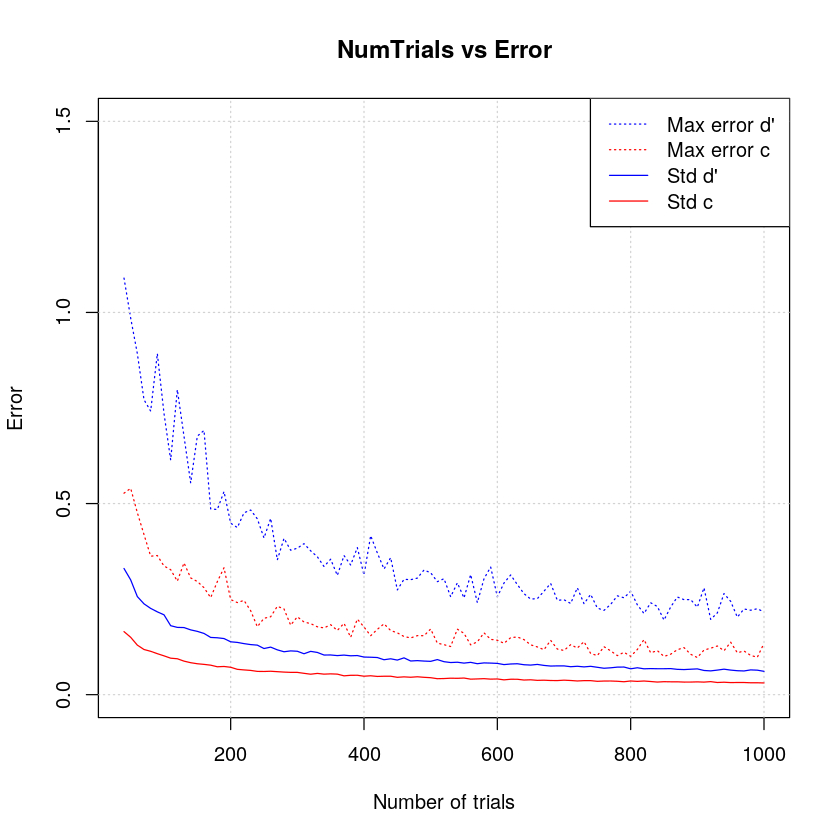

In [26]:
plot(grid, maxdpDifs, ylim=c(0,1.5), main="NumTrials vs Error", ylab="Error", xlab="Number of trials",
     type='l', lty='dotted', col='blue')
grid()
points(grid, maxcDifs, type='l', lty='dotted', col='red')
points(grid, sddps, type='l', col='blue')
points(grid, sdcs, type='l', col='red')
legend('topright', c('Max error d\'','Max error c','Std d\'','Std c'),
       col=c('blue','red'), lty=c('dotted','dotted','solid','solid'))